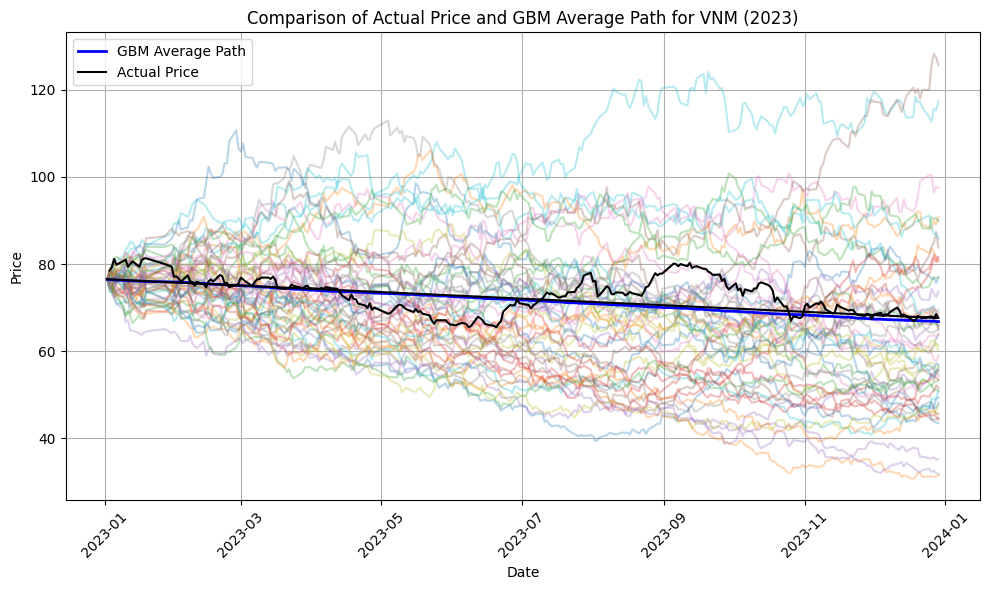

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

average_path_data = pd.read_csv('./gbm_price/VNM.csv')
hose_df_2023 = pd.read_csv('./data/hose_df_2023.csv')
# Convert 'date' column to datetime format
average_path_data['date'] = pd.to_datetime(average_path_data['date'])
hose_df_2023['date'] = pd.to_datetime(hose_df_2023['date'])
# Filter actual price data for VNM from hose_df_2023
actual_price_data = hose_df_2023[hose_df_2023['ticker'] == 'VNM'][['date', 'open', 'close']]

# Get the minimum date and the corresponding open price
min_date = actual_price_data['date'].min()
min_open_price = actual_price_data[actual_price_data['date'] == min_date]['open'].values[0]

# Create a new row with date = min_date - 1 day and 'close' = min_open_price
new_row = pd.DataFrame({'date': [min_date - pd.Timedelta(days=1)], 'open': [min_open_price], 'close': [min_open_price]})

# Insert the new row at the beginning of the actual price DataFrame
actual_price_data = pd.concat([new_row, actual_price_data[['date', 'close']].rename(columns={'close': 'open'})], ignore_index=True)

# Insert the new row at the beginning of the GBM path DataFrame
new_gbm_row = pd.DataFrame({'date': [min_date - pd.Timedelta(days=1)], **{f'path_{i+1}': min_open_price for i in range(100)}})
average_path_data = pd.concat([new_gbm_row, average_path_data], ignore_index=True)

# Calculate the average GBM path
average_path_data['average'] = average_path_data.iloc[:, 1:].mean(axis=1)

# Plot actual price and average GBM path
plt.figure(figsize=(10, 6))

# Plot randomly selected 50 GBM paths
gbm_paths = random.sample(list(average_path_data.columns[1:101]), 50)
for col in gbm_paths:
    plt.plot(average_path_data['date'], average_path_data[col], alpha=0.3)

# Plot average GBM path with a bold line
plt.plot(average_path_data['date'], average_path_data['average'], label='GBM Average Path', color='blue', linewidth=2)

# Plot actual price
plt.plot(actual_price_data['date'], actual_price_data['open'], label='Actual Price', color='black')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Actual Price and GBM Path for VNM (2023)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

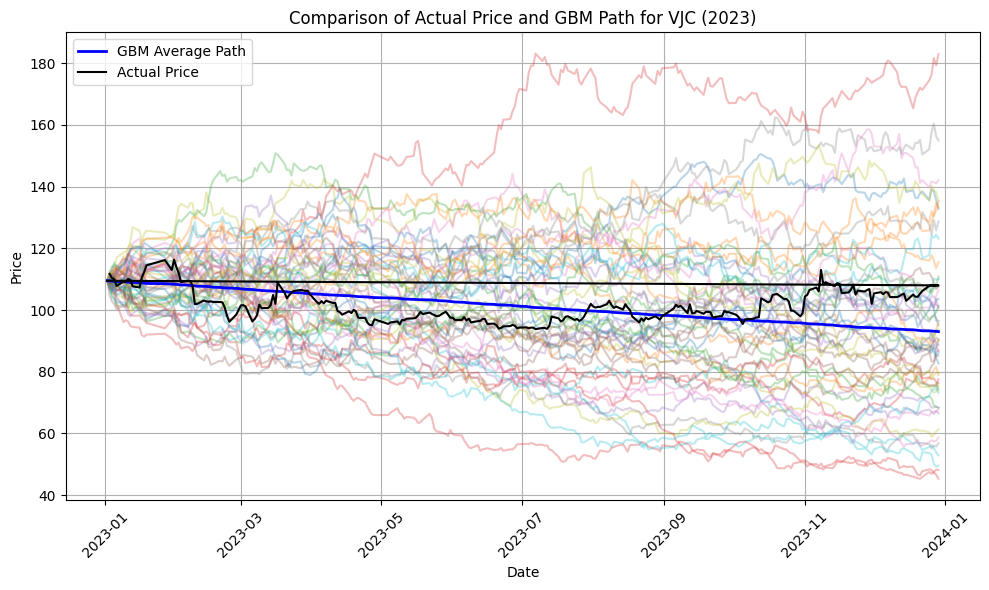

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import warnings


average_path_data = pd.read_csv('./gbm_price/VJC.csv')
hose_df_2023 = pd.read_csv('./data/hose_df_2023.csv')
# Convert 'date' column to datetime format
average_path_data['date'] = pd.to_datetime(average_path_data['date'])
hose_df_2023['date'] = pd.to_datetime(hose_df_2023['date'])
# Filter actual price data for VJC from hose_df_2023
actual_price_data = hose_df_2023[hose_df_2023['ticker'] == 'VJC'][['date', 'open', 'close']]

# Get the minimum date and the corresponding open price
min_date = actual_price_data['date'].min()
min_open_price = actual_price_data[actual_price_data['date'] == min_date]['open'].values[0]

# Create a new row with date = min_date - 1 day and 'close' = min_open_price
new_row = pd.DataFrame({'date': [min_date - pd.Timedelta(days=1)], 'open': [min_open_price], 'close': [min_open_price]})

# Insert the new row at the beginning of the actual price DataFrame
actual_price_data = pd.concat([new_row, actual_price_data[['date', 'close']].rename(columns={'close': 'open'})], ignore_index=True)

# Insert the new row at the beginning of the GBM path DataFrame
new_gbm_row = pd.DataFrame({'date': [min_date - pd.Timedelta(days=1)], **{f'path_{i+1}': min_open_price for i in range(100)}})
average_path_data = pd.concat([new_gbm_row, average_path_data], ignore_index=True)

# Calculate the average GBM path
average_path_data['average'] = average_path_data.iloc[:, 1:].mean(axis=1)

# Plot actual price and average GBM path
plt.figure(figsize=(10, 6))

# Plot randomly selected 50 GBM paths
gbm_paths = random.sample(list(average_path_data.columns[1:101]), 50)
for col in gbm_paths:
    plt.plot(average_path_data['date'], average_path_data[col], alpha=0.3)

# Plot average GBM path with a bold line
plt.plot(average_path_data['date'], average_path_data['average'], label='GBM Average Path', color='blue', linewidth=2)

# Plot actual price
plt.plot(actual_price_data['date'], actual_price_data['open'], label='Actual Price', color='black')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Actual Price and GBM Path for VJC (2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()